# Household Labor Supply \& Taxes
### By Hans Christian Jul Lehmann

## Table of Contents
* [Exercise 1: Unweighted/Weighted Utility Function](#first-bullet)
* [Exercise 3: Labor Response from Different Tax Schemes](#third-bullet)
    - [Joint Taxation](#thirdA-bullet)
    - [Individual Taxation](#thirdB-bullet)
    - [Comparing Labor Supply Responses](#thirdC-bullet)
* [Exercise 4: Government Revenue from Different Tax Schemes](#fourth-bullet)
* [Exercise 5: Equivalent Government Revenue](#fifth-bullet)
* [Exercise 6: Preference of Tax System in Beginning of Life](#sixth-bullet)
    - [Scenario 1: $K_{1,0}=2, K_{2,0}=0$](#sixthA-bullet)
    - [Scenario 2: $K_{1,0}=8, K_{2,0}=8$](#sixthB-bullet)

# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.ticker as mtick
from consav.linear_interp import interp_2d
import os

# load local model file and initialize model class
from DynHouseholdLaborModel import DynHouseholdLaborModelClass

# Exercise 1: Unweighted/Weighted Utility Function <a class="anchor" id="first-bullet"></a>

The weighted utility function is written in the `DynHouseholdLaborModel.py` file.

In [2]:
# instantiate models
model_no_weight = DynHouseholdLaborModelClass(par={'weight_mu':False}) # unweighted utilitymodel = DynHouseholdLaborModelClass() # weighted utility, mu = 0.5
model = DynHouseholdLaborModelClass() # equally weighted utility, mu = 0.5
model_alt_weight = DynHouseholdLaborModelClass(par={'mu':0.4}) # larger weight on the women

When solving, I assume that agent 1 starts with human capital of 2 while agent 2 starts with human capital of $0$ i.e., $K_{1,0}=2, K_{2,0}=0$.

In [3]:
def solve_and_simulate_model(model, initial_k1=2.0):
    # solve
    model.solve()
    
    # simulate
    model.sim.k1_init = initial_k1 * np.ones(model.par.simN)
    model.simulate()

# Solve and simulate models
solve_and_simulate_model(model)
solve_and_simulate_model(model_no_weight)
solve_and_simulate_model(model_alt_weight)

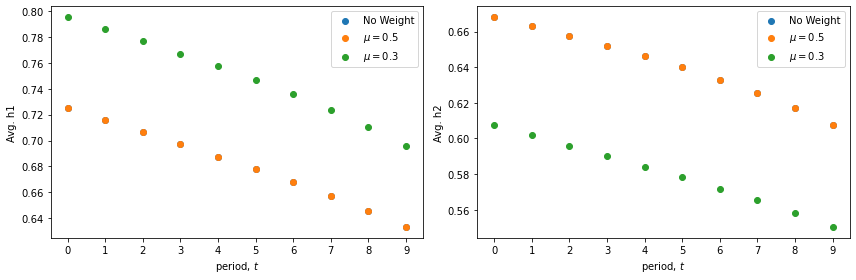

In [4]:
# Plot behavior
variables = ['h1', 'h2']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, var in enumerate(variables):
    col = i % 2
    ax = axes[col]
    ax.scatter(range(model.par.simT), np.mean(getattr(model.sim, var), axis=0), label='No Weight')
    ax.scatter(range(model.par.simT), np.mean(getattr(model_no_weight.sim, var), axis=0), label='$\mu = 0.5$')
    ax.scatter(range(model.par.simT), np.mean(getattr(model_alt_weight.sim, var), axis=0), label='$\mu = 0.3$')
    ax.set(xlabel='period, $t$', ylabel=f'Avg. {var}', xticks=range(model.par.simT))
    ax.legend()

# layout
plt.tight_layout()

if not os.path.exists("../plots"):
        os.makedirs("../plots")
    
plt.savefig("../plots/WeightedUtility.pdf", bbox_inches='tight')
plt.show()

# Exercise 3: Labor Response from Different Tax Schemes <a class="anchor" id="third-bullet"></a>

I this question I explore the realms of different taxation and its effects on labor supply.

## Joint Taxation <a class="anchor" id="thirdA-bullet"></a>

$$
T_{\text{joint}}\left(Y_1, Y_2\right)=\left(1-\lambda^{\text{joint}}\left(Y_1+Y_2\right)^{-\tau^\text{joint}}\right) \cdot\left(Y_1+Y_2\right),
$$
where $\lambda^{\text{joint}}=2.28$, $\tau^{\text{joint}}=0.0861765$.

In [5]:
# create instance
model_joint = DynHouseholdLaborModelClass() # default par.joint_tax = True, tax_scale = 2.278029 tax_pow = 0.0861765

par_joint = model_joint.par
sol_joint = model_joint.sol
sim_joint = model_joint.sim
#par_joint #check correct parameter values for tax_scale & tax_power

Solve model:

In [6]:
model_joint.solve()

Simulate model:

In [7]:
sim_joint.k1_init = 2.0*np.ones(par_joint.simN) # default is zero
model_joint.simulate()

## Individual Taxation <a class="anchor" id="thirdB-bullet"></a>

$$
\begin{aligned}
T_{\text{indiv}}\left(Y_1, Y_2\right) & =\left(1-\lambda^\text{indiv}Y_1^{-\tau^\text{indiv}}\right) \cdot Y_1 + \left(1-\lambda^{i n d i v}Y_2^{-\tau^\text{indiv}}\right) \cdot Y_2
\end{aligned}
$$
where $\lambda^{\text{indiv}}=1.75$, $\tau^{\text{indiv}}=0.0646416$.

In [8]:
# load local model file and initialize model class
model_indiv = DynHouseholdLaborModelClass(par={'joint_tax':False,'tax_scale':1.75,'tax_pow':0.0646416})

par_indiv = model_indiv.par
sol_indiv = model_indiv.sol
sim_indiv = model_indiv.sim
#par_indiv #check correct parameter values for tax_scale & tax_power

Solve model:

In [9]:
model_indiv.solve()

Simulate model:

In [10]:
sim_indiv.k1_init = 2.0*np.ones(par_indiv.simN) # default is zero
model_indiv.simulate()

## Comparing Labor Supply Responses <a class="anchor" id="thirdC-bullet"></a>

#### Simulated Behavior

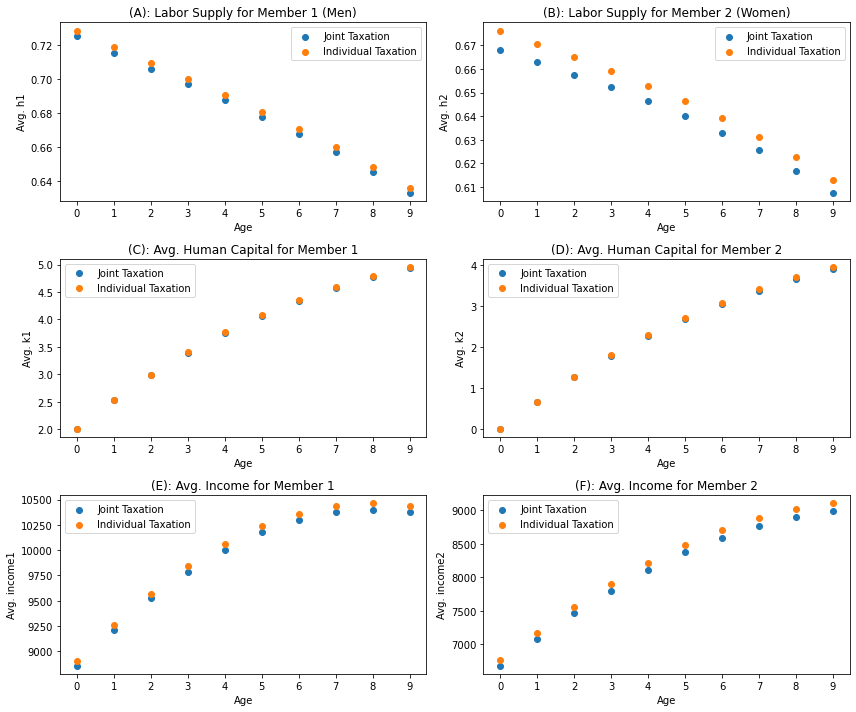

In [11]:
# create a figure with 6 subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# plot behavior
for var, ax in zip(('h1','h2','k1','k2','income1','income2'), axs.flatten()):
    ax.scatter(range(par_joint.simT),np.mean(getattr(model_joint.sim,var),axis=0),label='Joint Taxation')
    ax.scatter(range(par_indiv.simT),np.mean(getattr(model_indiv.sim,var),axis=0),label='Individual Taxation')
    ax.legend(frameon=True)
    ax.set(xlabel='Age',ylabel=f'Avg. {var}',xticks=range(par_joint.simT));    
    
    # add subplot title
    if var == 'h1':
        ax.set_title('(A): Labor Supply for Member 1 (Men)')
    elif var == 'h2':
        ax.set_title('(B): Labor Supply for Member 2 (Women)')
    elif var == 'k1':
        ax.set_title('(C): Avg. Human Capital for Member 1')
    elif var == 'k2':
        ax.set_title('(D): Avg. Human Capital for Member 2')
    elif var == 'income1':
        ax.set_title('(E): Avg. Income for Member 1')
    elif var == 'income2':
        ax.set_title('(F): Avg. Income for Member 2')
    
# layout 
fig.tight_layout(pad=1); # spacing between subplots
plt.tight_layout()

if not os.path.exists("../plots"):
        os.makedirs("../plots")
    
plt.savefig("../plots/SimulatedBehaviorTaxSchemes.pdf", bbox_inches='tight')
plt.show()

#### Marshall Elasticities

In [12]:
# import local file
from DynHouseholdLaborModel import plot_elasticities

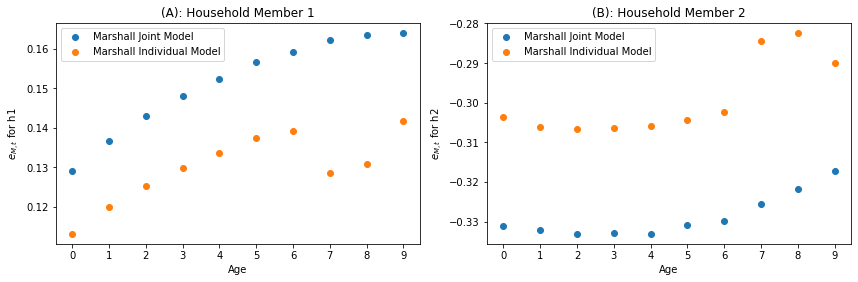

In [13]:
# Calculate elasticity for member 1 under joint taxation
model_joint_1 = model_joint.copy()
model_joint_1.par.wage_const_1 = np.log(np.exp(model_joint.par.wage_const_1) * 1.01)  # 1% increase in wage for member 1

# Calculate elasticity for member 1 under individual taxation
model_indiv_1 = model_indiv.copy()
model_indiv_1.par.wage_const_1 = np.log(np.exp(model_indiv.par.wage_const_1) * 1.01)  # 1% increase in wage for member 1

# Calculate elasticity for member 2 under joint taxation
model_joint_2 = model_joint.copy()
model_joint_2.par.wage_const_2 = np.log(np.exp(model_joint.par.wage_const_2) * 1.01)  # 1% increase in wage for member 2

# Calculate elasticity for member 2 under individual taxation
model_indiv_2 = model_indiv.copy()
model_indiv_2.par.wage_const_2 = np.log(np.exp(model_indiv.par.wage_const_2) * 1.01)  # 1% increase in wage for member 2

plot_elasticities([model_joint, model_indiv], [model_joint_1, model_indiv_1, model_joint_2, model_indiv_2])

# Exercise 4: Government Revenue from Different Tax Schemes <a class="anchor" id="fourth-bullet"></a>

Government revenue accross time for each tax system.

In [14]:
tax_rev_joint = np.sum(model_joint.sim.tax, axis=0)
tax_rev_indiv = np.sum(model_indiv.sim.tax, axis=0)

# Difference in Tax Revenue across time
tax_revenue_difference = tax_rev_indiv - tax_rev_joint
tax_revenue_difference

array([188197.3350858 , 179742.09603023, 171599.91280865, 163934.95851071,
       157035.44273808, 150955.91525639, 145968.19647367, 142118.44302486,
       139609.63494046, 138418.03779582])

Total government revenue and difference between the two tax schemes.

In [15]:
# Calculate the change in government budget
total_tax_rev_joint = np.sum(model_joint.sim.tax)
total_tax_rev_indiv = np.sum(model_indiv.sim.tax)

change_in_govt_budget = total_tax_rev_indiv - total_tax_rev_joint

print(f'Total tax revenue under joint taxation: {total_tax_rev_joint}')
print(f'Total tax revenue under individual taxation: {total_tax_rev_indiv}')
print(f'The difference in government revenue from individual and joint taxation is {change_in_govt_budget}.')

Total tax revenue under joint taxation: 3765393.375754662
Total tax revenue under individual taxation: 5342973.348419268
The difference in government revenue from individual and joint taxation is 1577579.9726646058.


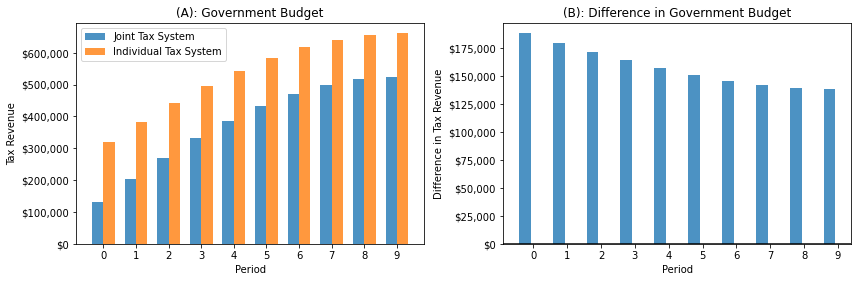

In [16]:
# Set up the x-axis (time)
time = np.arange(model_joint.par.simT)

# Define bar width
bar_width = 0.35

# Create the figure with 1 row and 2 columns
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

# First subplot: comparison of tax systems
ax = axs[0]
ax.bar(time - bar_width/2, tax_rev_joint, width=bar_width, label='Joint Tax System', alpha=0.8)
ax.bar(time + bar_width/2, tax_rev_indiv, width=bar_width, label='Individual Tax System', alpha=0.8)

# Add labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Tax Revenue')
ax.set_title('(A): Government Budget')
ax.set_xticks(time)
ax.legend(loc='upper left')

# Add thousand separator to y-axis labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Second subplot: change in government budget
ax = axs[1]
bar_width2 = 0.5
ax.bar(time - bar_width2/2, tax_revenue_difference, width=bar_width, alpha=0.8, color='tab:blue')

# Add labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Difference in Tax Revenue')
ax.set_title('(B): Difference in Government Budget')
ax.set_xticks(time)

# Add thousand separator to y-axis labels
ax.yaxis.set_major_formatter(tick)

# Add black horizontal line at y=0
ax.axhline(0, color='black')  

# layout 
fig.tight_layout(pad=1); # spacing between subplots

if not os.path.exists("../plots"):
        os.makedirs("../plots")
    
plt.savefig("../plots/GovernmentRevenue.pdf", bbox_inches='tight')
plt.show()

# Exercise 5: Equivalent Government Revenue <a class="anchor" id="fifth-bullet"></a>

In [17]:
def tax_revenue_diff(lambda_private):
    """
    Calculate the difference in tax revenue between the individual and joint taxation systems.

    Args:
        lambda_private (float): The value of the lambda parameter for the individual taxation system.

    Returns:
        float: The difference in tax revenue between the individual and joint taxation systems.
    """
    # Set lambda for individual taxation system
    model_indiv.par.tax_scale = lambda_private

    # Re-solve the model after updating the tax_scale parameter
    model_indiv.solve()

    # Simulate tax revenues for the individual taxation system
    model_indiv.simulate()

    # Calculate the total tax revenue for the individual system
    total_tax_rev_indiv = np.sum(model_indiv.sim.tax)

    # Return the difference between the tax revenues
    return total_tax_rev_indiv - total_tax_rev_joint

I use a root finding scalar to find the $\lambda^{\text{private},*}$ that ensures total government revenue difference is approximately zero, note, however, the government revenue difference does vary within a given period. 

In [18]:
from scipy.optimize import brentq
from IPython.display import display, Math

# Find the root of the tax revenue difference function using brentq method
result = brentq(tax_revenue_diff, 1.0, 5.0)

# Get the value of lambda_indiv_star
lambda_private_star = result

display(Math(f"\\lambda^{{\\text{{private}}, \\star}} = {lambda_private_star}"))

<IPython.core.display.Math object>

Plot:

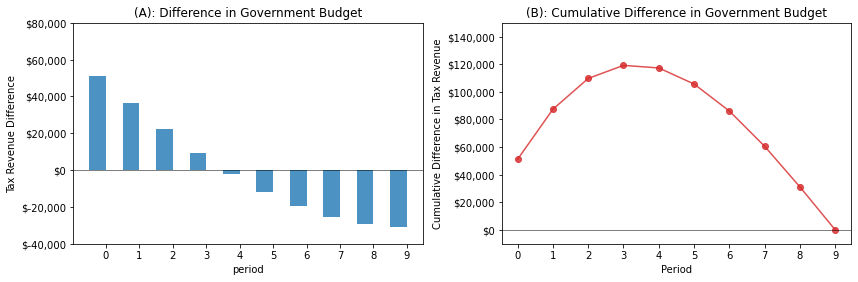

In [19]:
# Data
tax_rev_joint = np.sum(model_joint.sim.tax, axis=0)
tax_rev_indiv = np.sum(model_indiv.sim.tax, axis=0)
tax_revenue_difference = tax_rev_indiv - tax_rev_joint
cumulative_difference = np.cumsum(tax_revenue_difference)

# Set up the x-axis (time)
time = np.arange(model_joint.par.simT)

# Define bar width
bar_width = 0.5

# Create the figure with 1 row and 2 columns
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

# First subplot: comparison of tax systems
ax = axs[0]
ax.bar(time - bar_width/2, tax_revenue_difference, width=bar_width, alpha=0.8, color='tab:blue')

# Add labels and title
ax.set_xlabel('period')
ax.set_ylabel('Tax Revenue Difference')
ax.set_title('(A): Difference in Government Budget')
ax.set_xticks(time)
ax.set_ylim([-40000, 80000])

# Add thousand separator to y-axis labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Add horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.5)

# Second subplot: change in government budget
ax = axs[1]
ax.plot(time, cumulative_difference, '-o', alpha=0.8, label='Cumulative Difference', color='tab:red')

# Add labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Cumulative Difference in Tax Revenue')
ax.set_title('(B): Cumulative Difference in Government Budget')
ax.set_xticks(time)
ax.set_ylim([-10000, 150000])

# Add thousand separator to y-axis labels
ax.yaxis.set_major_formatter(tick)

# Add horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.5)

# layout 
fig.tight_layout(pad=1); # spacing between subplots

if not os.path.exists("../plots"):
        os.makedirs("../plots")
    
plt.savefig("../plots/GovernmentRevenueEquivalence.pdf", bbox_inches='tight')
plt.show()

# Exercise 6: Preference of Tax System in Beginning of Life <a class="anchor" id="sixth-bullet"></a>

I compare the value function of a household under two different taxation systems at the begining of life. First, I explore the grid and note that we need to solve "off" the grid. Hence, I apply a linear interpolate method.

In [20]:
model.par.k_grid

array([ 0.        ,  0.78415341,  1.58372944,  2.39976273,  3.23341808,
        4.08601576,  4.95906369,  5.85429896,  6.77374258,  7.71977282,
        8.69522594,  9.70353838, 10.74895408, 11.83683909, 12.97418346,
       14.17045508, 15.43918349, 16.8012842 , 18.29353789, 20.        ])

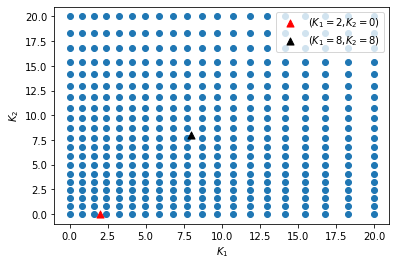

In [21]:
fig, ax = plt.subplots()
k1_mesh,k2_mesh = np.meshgrid(model.par.k_grid,model.par.k_grid,indexing='ij')
ax.scatter(k1_mesh,k2_mesh)
ax.scatter(2, 0, color='red', marker='^',s=50, label='($K_{1}=2$,$K_2=0$)') # Add a red triangle at point (2,0) with a label
ax.scatter(8, 8, color='black', marker='^',s=50, label='($K_{1}=8$,$K_2=8$)') # Add a black triangle at point (8,8) with a label
ax.set(xlabel='$K_1$',ylabel='$K_2$');
ax.legend();  # Show the legends

if not os.path.exists("../plots"):
        os.makedirs("../plots")
    
plt.savefig("../plots/Grid.pdf", bbox_inches='tight')
plt.show()

## Scenario 1: $K_{1,0}=2, K_{2,0}=0$ <a class="anchor" id="sixthA-bullet"></a>

Solve the model under individual taxation:

In [22]:
model_indiv_q6 = model_indiv.copy()
model_indiv_q6.par.tax_scale = lambda_private_star
model_indiv_q6.solve()

Solve the model under joint taxation:

In [23]:
model_joint_q6 = model_joint.copy()
model_joint_q6.solve()

Now I interpolate over grid top find optimal values given an initial level of human capital and looking at period $0$:

In [24]:
# interpolate
model_indiv_q6_lowHC = interp_2d(model_indiv_q6.par.k_grid,model_indiv_q6.par.k_grid,model_indiv_q6.sol.V[0],2,0) 
model_joint_q6_lowHC = interp_2d(model_joint_q6.par.k_grid,model_joint_q6.par.k_grid,model_joint_q6.sol.V[0],2,0)

Print results:

In [25]:
print(f"Individual taxation system, initialized with low HC: {model_indiv_q6_lowHC}")
print(f"Joint taxation system, initialized with low HC: {model_joint_q6_lowHC}")
print(f"Difference between taxation system, initialized with low HC: {model_indiv_q6_lowHC - model_joint_q6_lowHC}")

Individual taxation system, initialized with low HC: -0.22677299424853892
Joint taxation system, initialized with low HC: -0.2268036560245404
Difference between taxation system, initialized with low HC: 3.0661776001472685e-05


## Scenario 2: $K_{1,0}=8, K_{2,0}=8$ <a class="anchor" id="sixthB-bullet"></a>

Now I interpolate over grid top find optimal values given an initial level of human capital and looking at period $0$:

In [26]:
# interpolate
model_indiv_q6_highHC = interp_2d(model_indiv_q6.par.k_grid,model_indiv_q6.par.k_grid,model_indiv_q6.sol.V[0],8,8) 
model_joint_q6_highHC = interp_2d(model_joint_q6.par.k_grid,model_joint_q6.par.k_grid,model_joint_q6.sol.V[0],8,8)

Print results:

In [27]:
print(f"Individual taxation system, initialized with high HC: {model_indiv_q6_highHC}")
print(f"Joint taxation system, initialized with high HC: {model_joint_q6_highHC}")
print(f"Difference between taxation system, initialized with high HC: {model_indiv_q6_highHC - model_joint_q6_highHC}")

Individual taxation system, initialized with high HC: -0.1884092670012815
Joint taxation system, initialized with high HC: -0.18915572656119886
Difference between taxation system, initialized with high HC: 0.0007464595599173673
